In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree

# Preprocessing
Import data, create relevant bins for cancer rate, and one-hot encode relevant variables.

In [2]:
# reading file
data_df = pd.read_csv("species_data_and_subclades.csv")

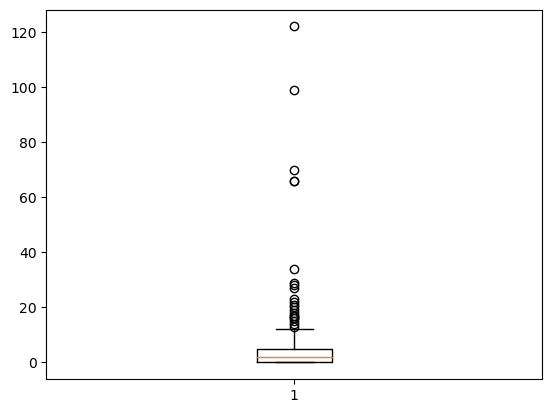

In [3]:
bp = plt.boxplot(data_df["neo"])

neo_min = min(data_df["neo"]) # 0
neo_boxmin = [line.get_ydata()[1] for line in bp['whiskers'][::2]] # 0
neo_q1 = [line.get_ydata()[1] for line in bp['boxes']] # 0
neo_med = [line.get_ydata()[0] for line in bp['medians']] # 2
neo_q3 = [line.get_ydata()[2] for line in bp['boxes']] # 5
neo_boxmax = [line.get_ydata()[1] for line in bp['whiskers'][1::2]] # 12
neo_max = max(data_df["neo"]) # 122

In [4]:
newbins = []
for i in range(len(data_df)):
    if (data_df.iloc[i]["neo"] <= neo_q1):
        newbins.append("low")
    elif (data_df.iloc[i]["neo"] <= neo_med):
        newbins.append("med")
    elif (data_df.iloc[i]["neo"] <= neo_q3):
        newbins.append("high")
    elif (data_df.iloc[i]["neo"] <= neo_boxmax):
        newbins.append("very-high")
    elif (data_df.iloc[i]["neo"] > neo_boxmax):
        newbins.append("outlying-high")

new_data_df = data_df.assign(bin_neo = newbins)

In [5]:
data_df_encoded = pd.get_dummies(new_data_df, columns=["therm"], drop_first=True)
data_df_encoded = pd.get_dummies(data_df_encoded, columns=["Class"], drop_first=False)

In [6]:
df_enc_sub_mod = data_df_encoded[data_df_encoded["Subclade"].isin(data_df_encoded["Subclade"].value_counts()[lambda x: x > 1].index)]
df_enc_sub_mod = df_enc_sub_mod.reset_index(drop = True)
data_df_encoded_subclades = pd.get_dummies(df_enc_sub_mod, columns=["Subclade"], drop_first=False)

In [7]:
subclade_list = [col for col in data_df_encoded_subclades.columns if 'Subclade' in col]
clade_list = [col for col in data_df_encoded_subclades.columns if 'Class' in col]

In [16]:
data_feat = subclade_list
X = data_df_encoded_subclades[data_feat]
y = data_df_encoded_subclades.bin_neo

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Predict the response for train dataset
z_pred = clf.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Test accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Training accuracy:", metrics.accuracy_score(y_train, z_pred))

print(clf.feature_importances_)

Test accuracy: 0.19402985074626866
Training accuracy: 0.5128205128205128
[0.01880103 0.03587866 0.03866909 0.02618615 0.00854981 0.02557
 0.02020718 0.0933932  0.0265942  0.04926183 0.         0.02410906
 0.01942774 0.03303679 0.02788398 0.01427769 0.00861161 0.03119248
 0.0047951  0.01924887 0.01432062 0.02985816 0.04639461 0.
 0.00852222 0.00275549 0.         0.04632133 0.04248841 0.01476923
 0.04494885 0.00674655 0.04503784 0.04775765 0.03051438 0.00714143
 0.02776019 0.05896858]


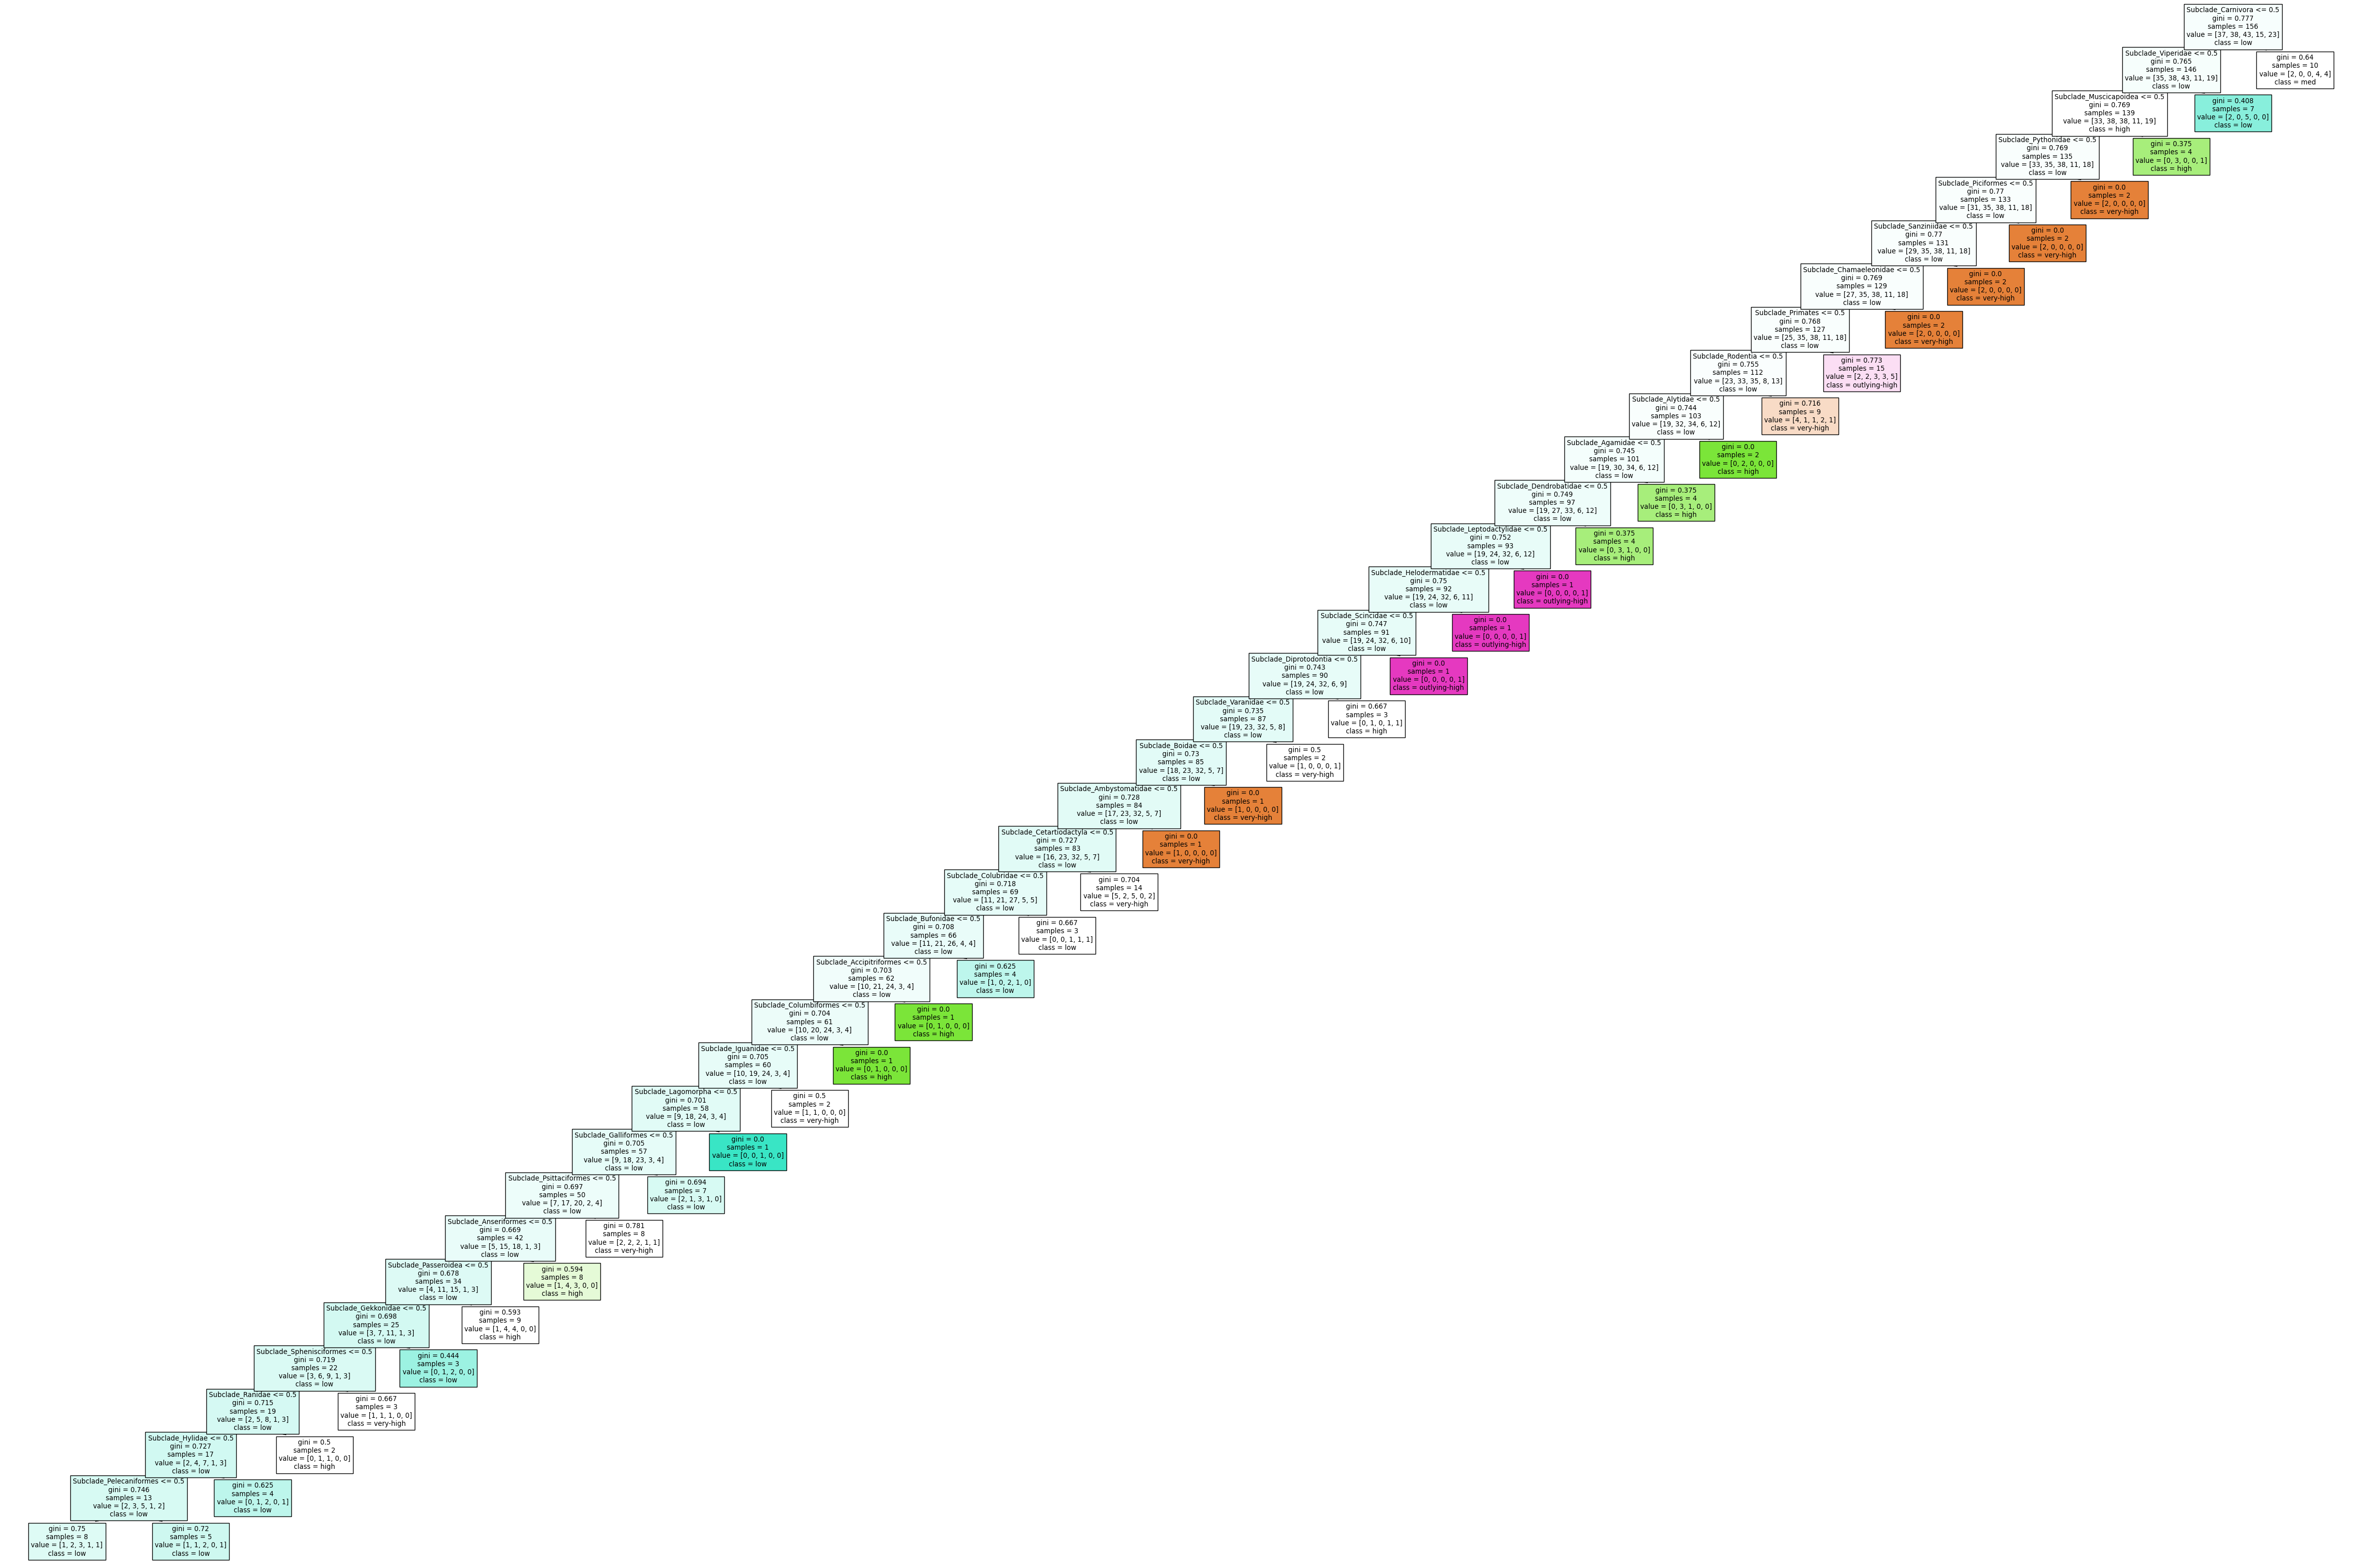

In [25]:
plt.figure(figsize=(60, 40))
plot_tree(clf, filled=True, feature_names=data_feat, class_names=data_df_encoded_subclades["bin_neo"].unique())
plt.show()

In [23]:
data_feat = clade_list
X = data_df_encoded_subclades[data_feat]
y = data_df_encoded_subclades.bin_neo

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Predict the response for train dataset
z_pred = clf.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Test accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Training accuracy:", metrics.accuracy_score(y_train, z_pred))

print(clf.feature_importances_)

Test accuracy: 0.2537313432835821
Training accuracy: 0.32051282051282054
[0.         0.03401551 0.61411873 0.35186576]


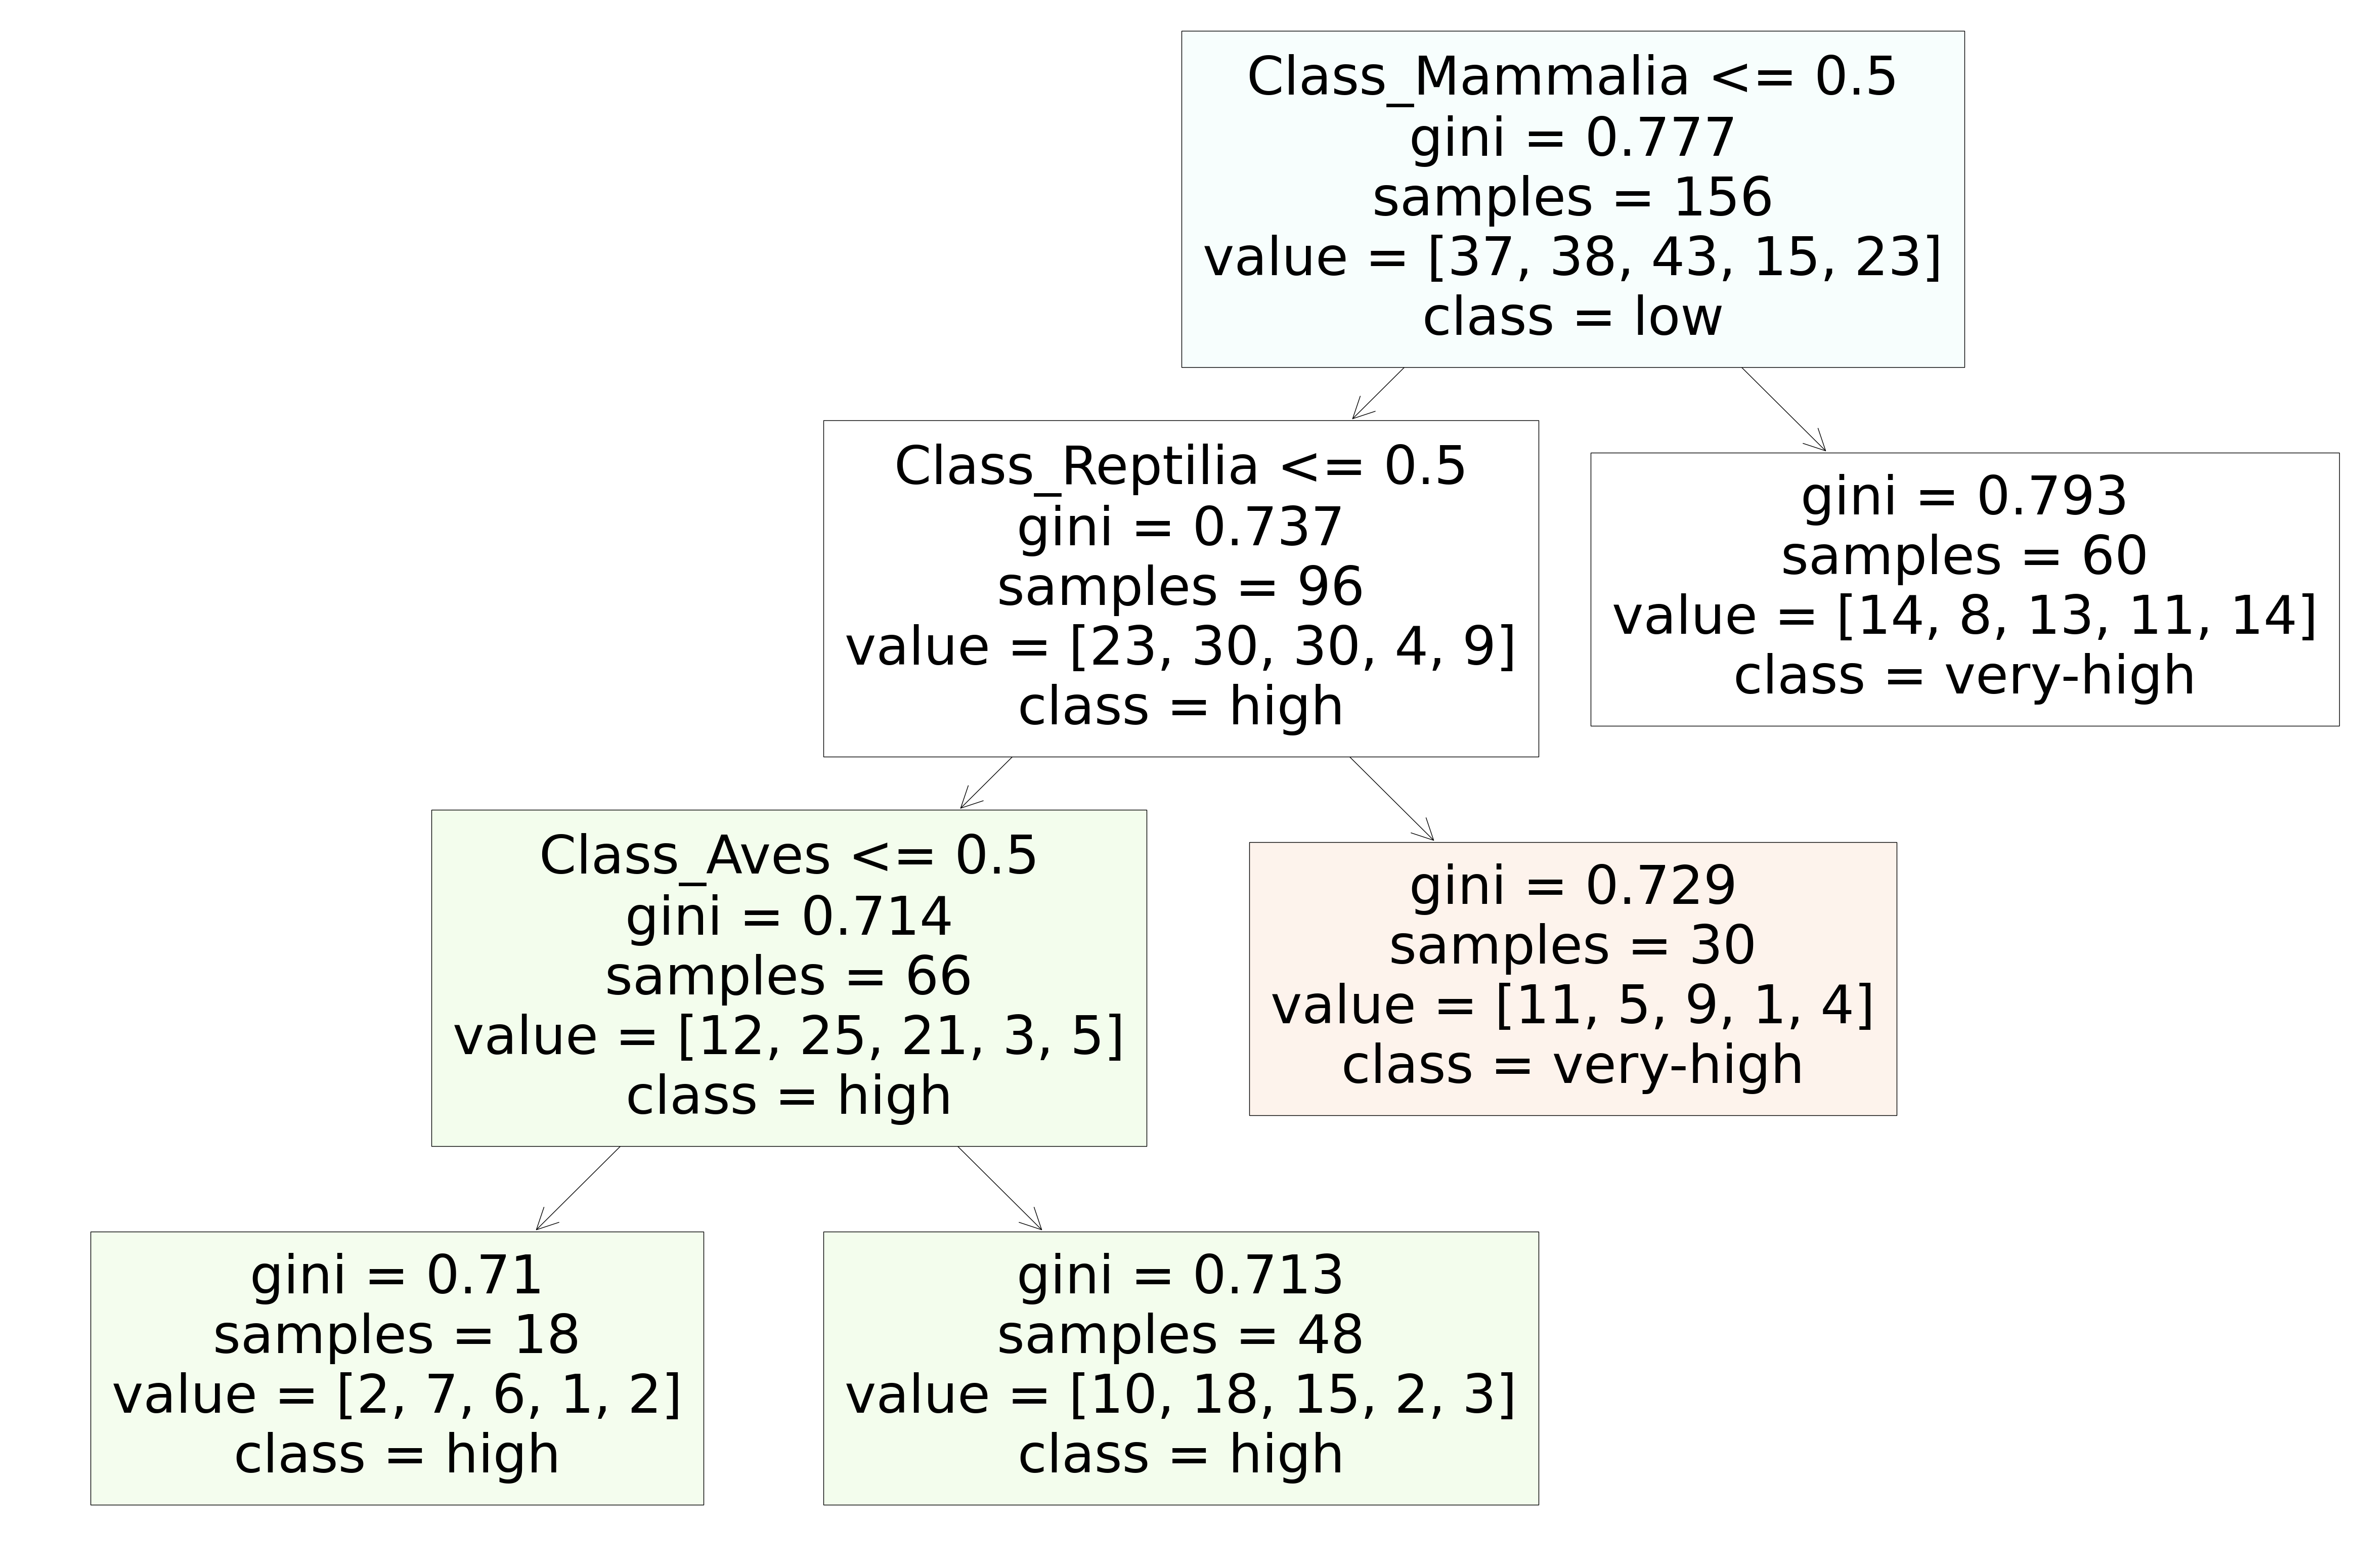

In [24]:
plt.figure(figsize=(60, 40))
plot_tree(clf, filled=True, feature_names=data_feat, class_names=data_df_encoded_subclades["bin_neo"].unique())
plt.show()

In [17]:
data_feat = ["log_pl", "log_bm"]
X = data_df_encoded_subclades[data_feat]
y = data_df_encoded_subclades.bin_neo

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Predict the response for train dataset
z_pred = clf.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Test accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Training accuracy:", metrics.accuracy_score(y_train, z_pred))

print(clf.feature_importances_)

Test accuracy: 0.19402985074626866
Training accuracy: 1.0
[0.52130339 0.47869661]


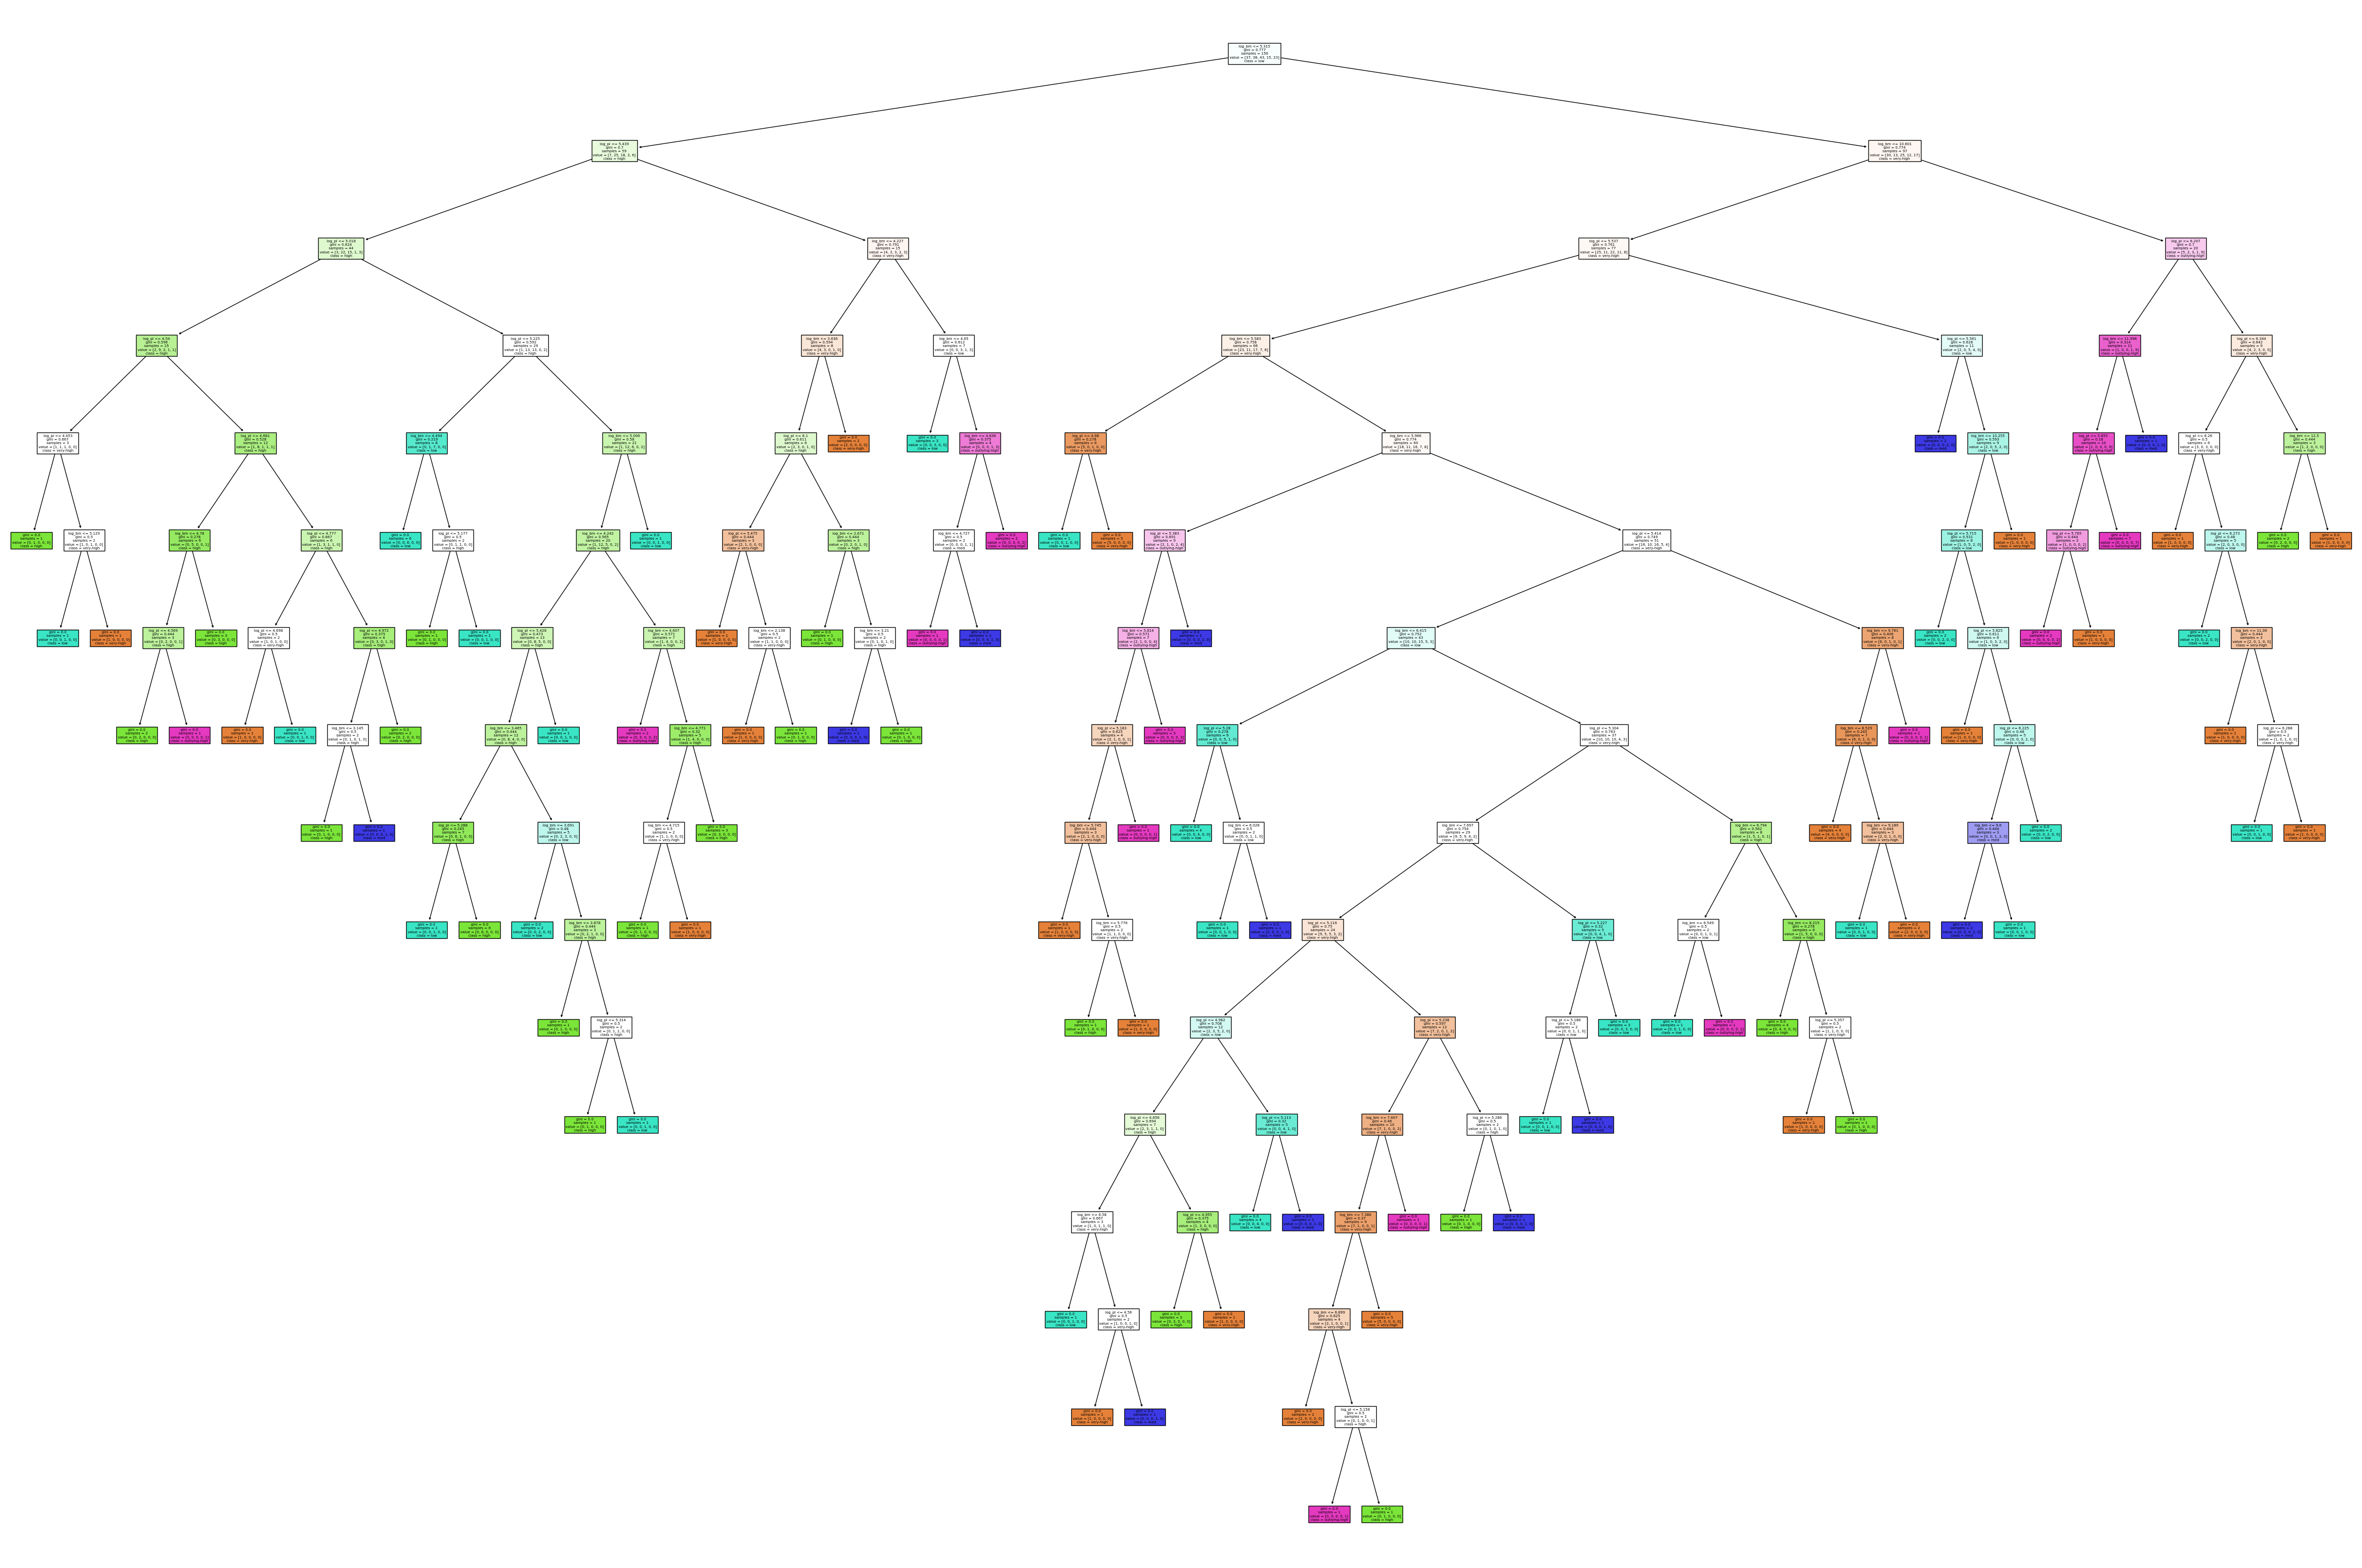

In [27]:
plt.figure(figsize=(60, 40))
plot_tree(clf, filled=True, feature_names=data_feat, class_names=data_df_encoded_subclades["bin_neo"].unique())
plt.show()

In [18]:
mam_df_enc = data_df_encoded_subclades[data_df_encoded_subclades["Class_Mammalia"] == 1]

In [19]:
data_feat = ["log_pl", "log_bm"]
X = mam_df_enc[data_feat]
y = mam_df_enc.bin_neo

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Predict the response for train dataset
z_pred = clf.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Test accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Training accuracy:", metrics.accuracy_score(y_train, z_pred))

print(clf.feature_importances_)

Test accuracy: 0.36
Training accuracy: 1.0
[0.58888426 0.41111574]


In [20]:
data_feat = ["log_pl", "log_bm"] + clade_list
X = data_df_encoded_subclades[data_feat]
y = data_df_encoded_subclades.bin_neo

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Predict the response for train dataset
z_pred = clf.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Test accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Training accuracy:", metrics.accuracy_score(y_train, z_pred))

print(clf.feature_importances_)

Test accuracy: 0.2537313432835821
Training accuracy: 1.0
[0.39824485 0.51559173 0.00824524 0.04381305 0.03410513 0.        ]


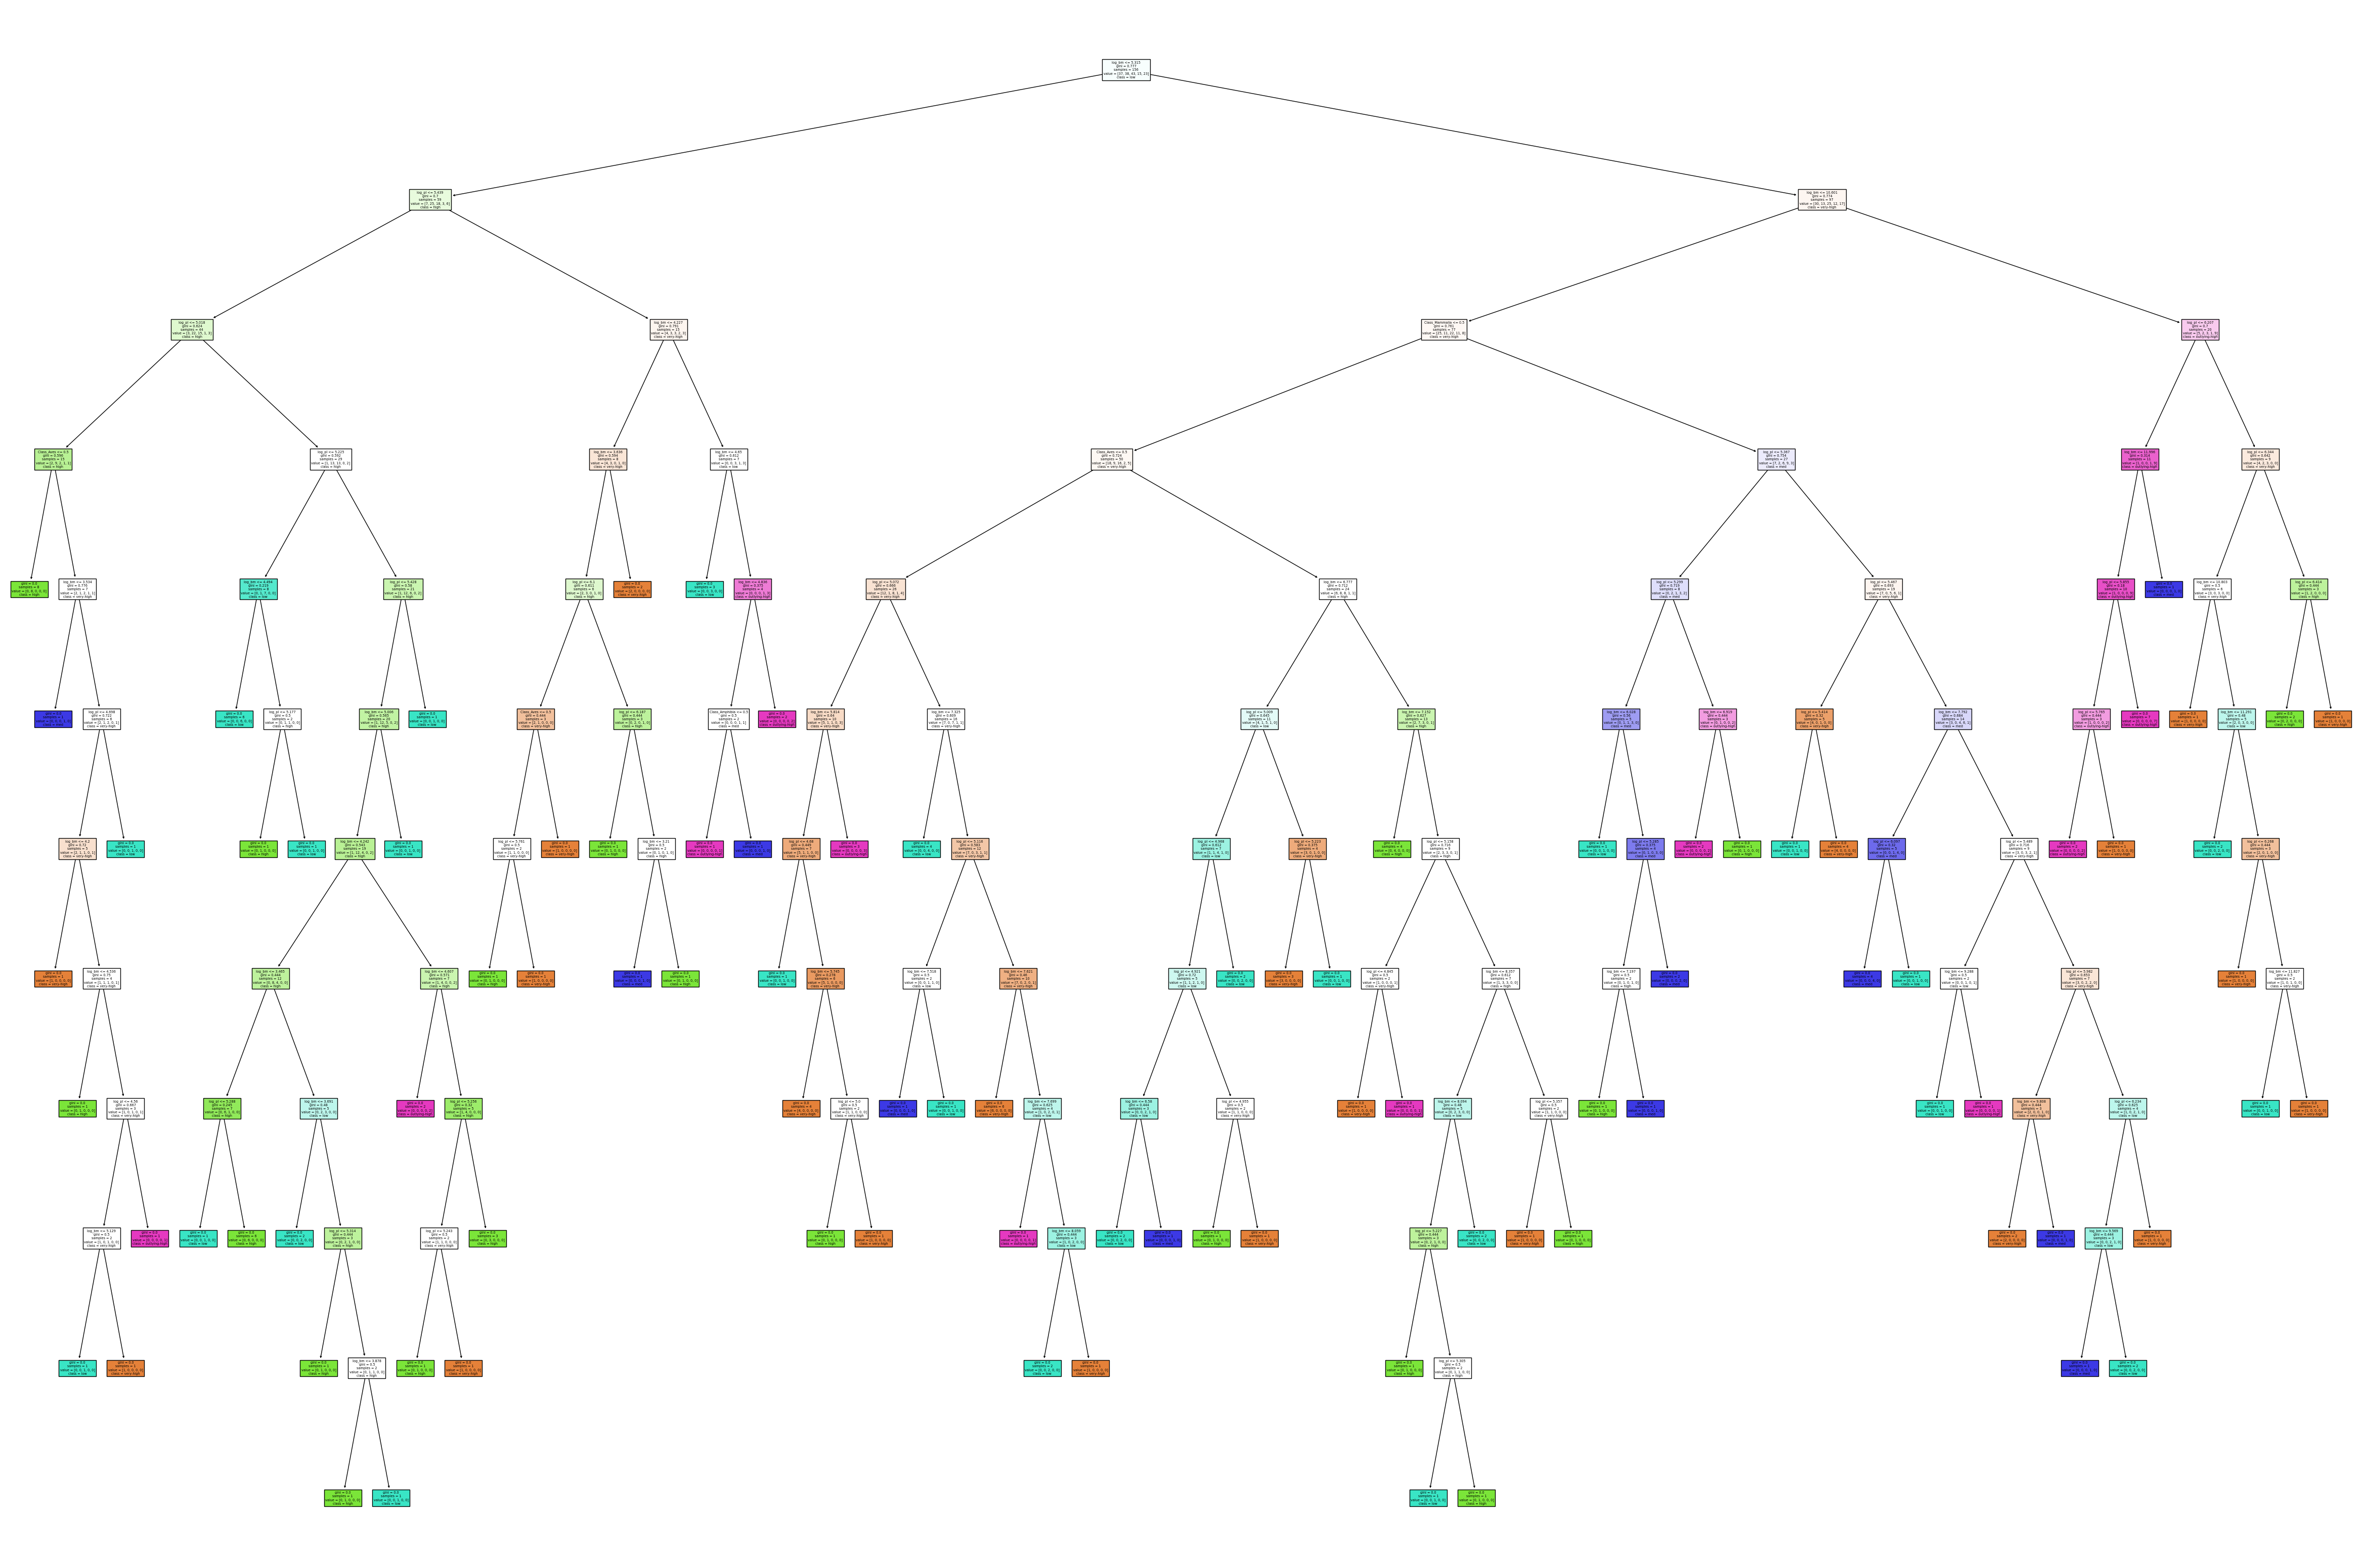

In [31]:
plt.figure(figsize=(60, 40))
plot_tree(clf, filled=True, feature_names=data_feat, class_names=data_df_encoded_subclades["bin_neo"].unique())
plt.show()

In [21]:
data_feat = ["log_pl", "log_bm"] + subclade_list
X = data_df_encoded_subclades[data_feat]
y = data_df_encoded_subclades.bin_neo

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Predict the response for train dataset
z_pred = clf.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Test accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Training accuracy:", metrics.accuracy_score(y_train, z_pred))

print(clf.feature_importances_)

Test accuracy: 0.2537313432835821
Training accuracy: 1.0
[0.3509276  0.42595591 0.         0.01374207 0.         0.00999423
 0.01450129 0.         0.01236786 0.02051628 0.         0.
 0.00824524 0.         0.         0.         0.02473573 0.02972035
 0.         0.         0.         0.00912866 0.00961945 0.
 0.         0.         0.         0.         0.         0.
 0.01527995 0.02538535 0.         0.         0.00274841 0.01369299
 0.         0.         0.         0.01343859]


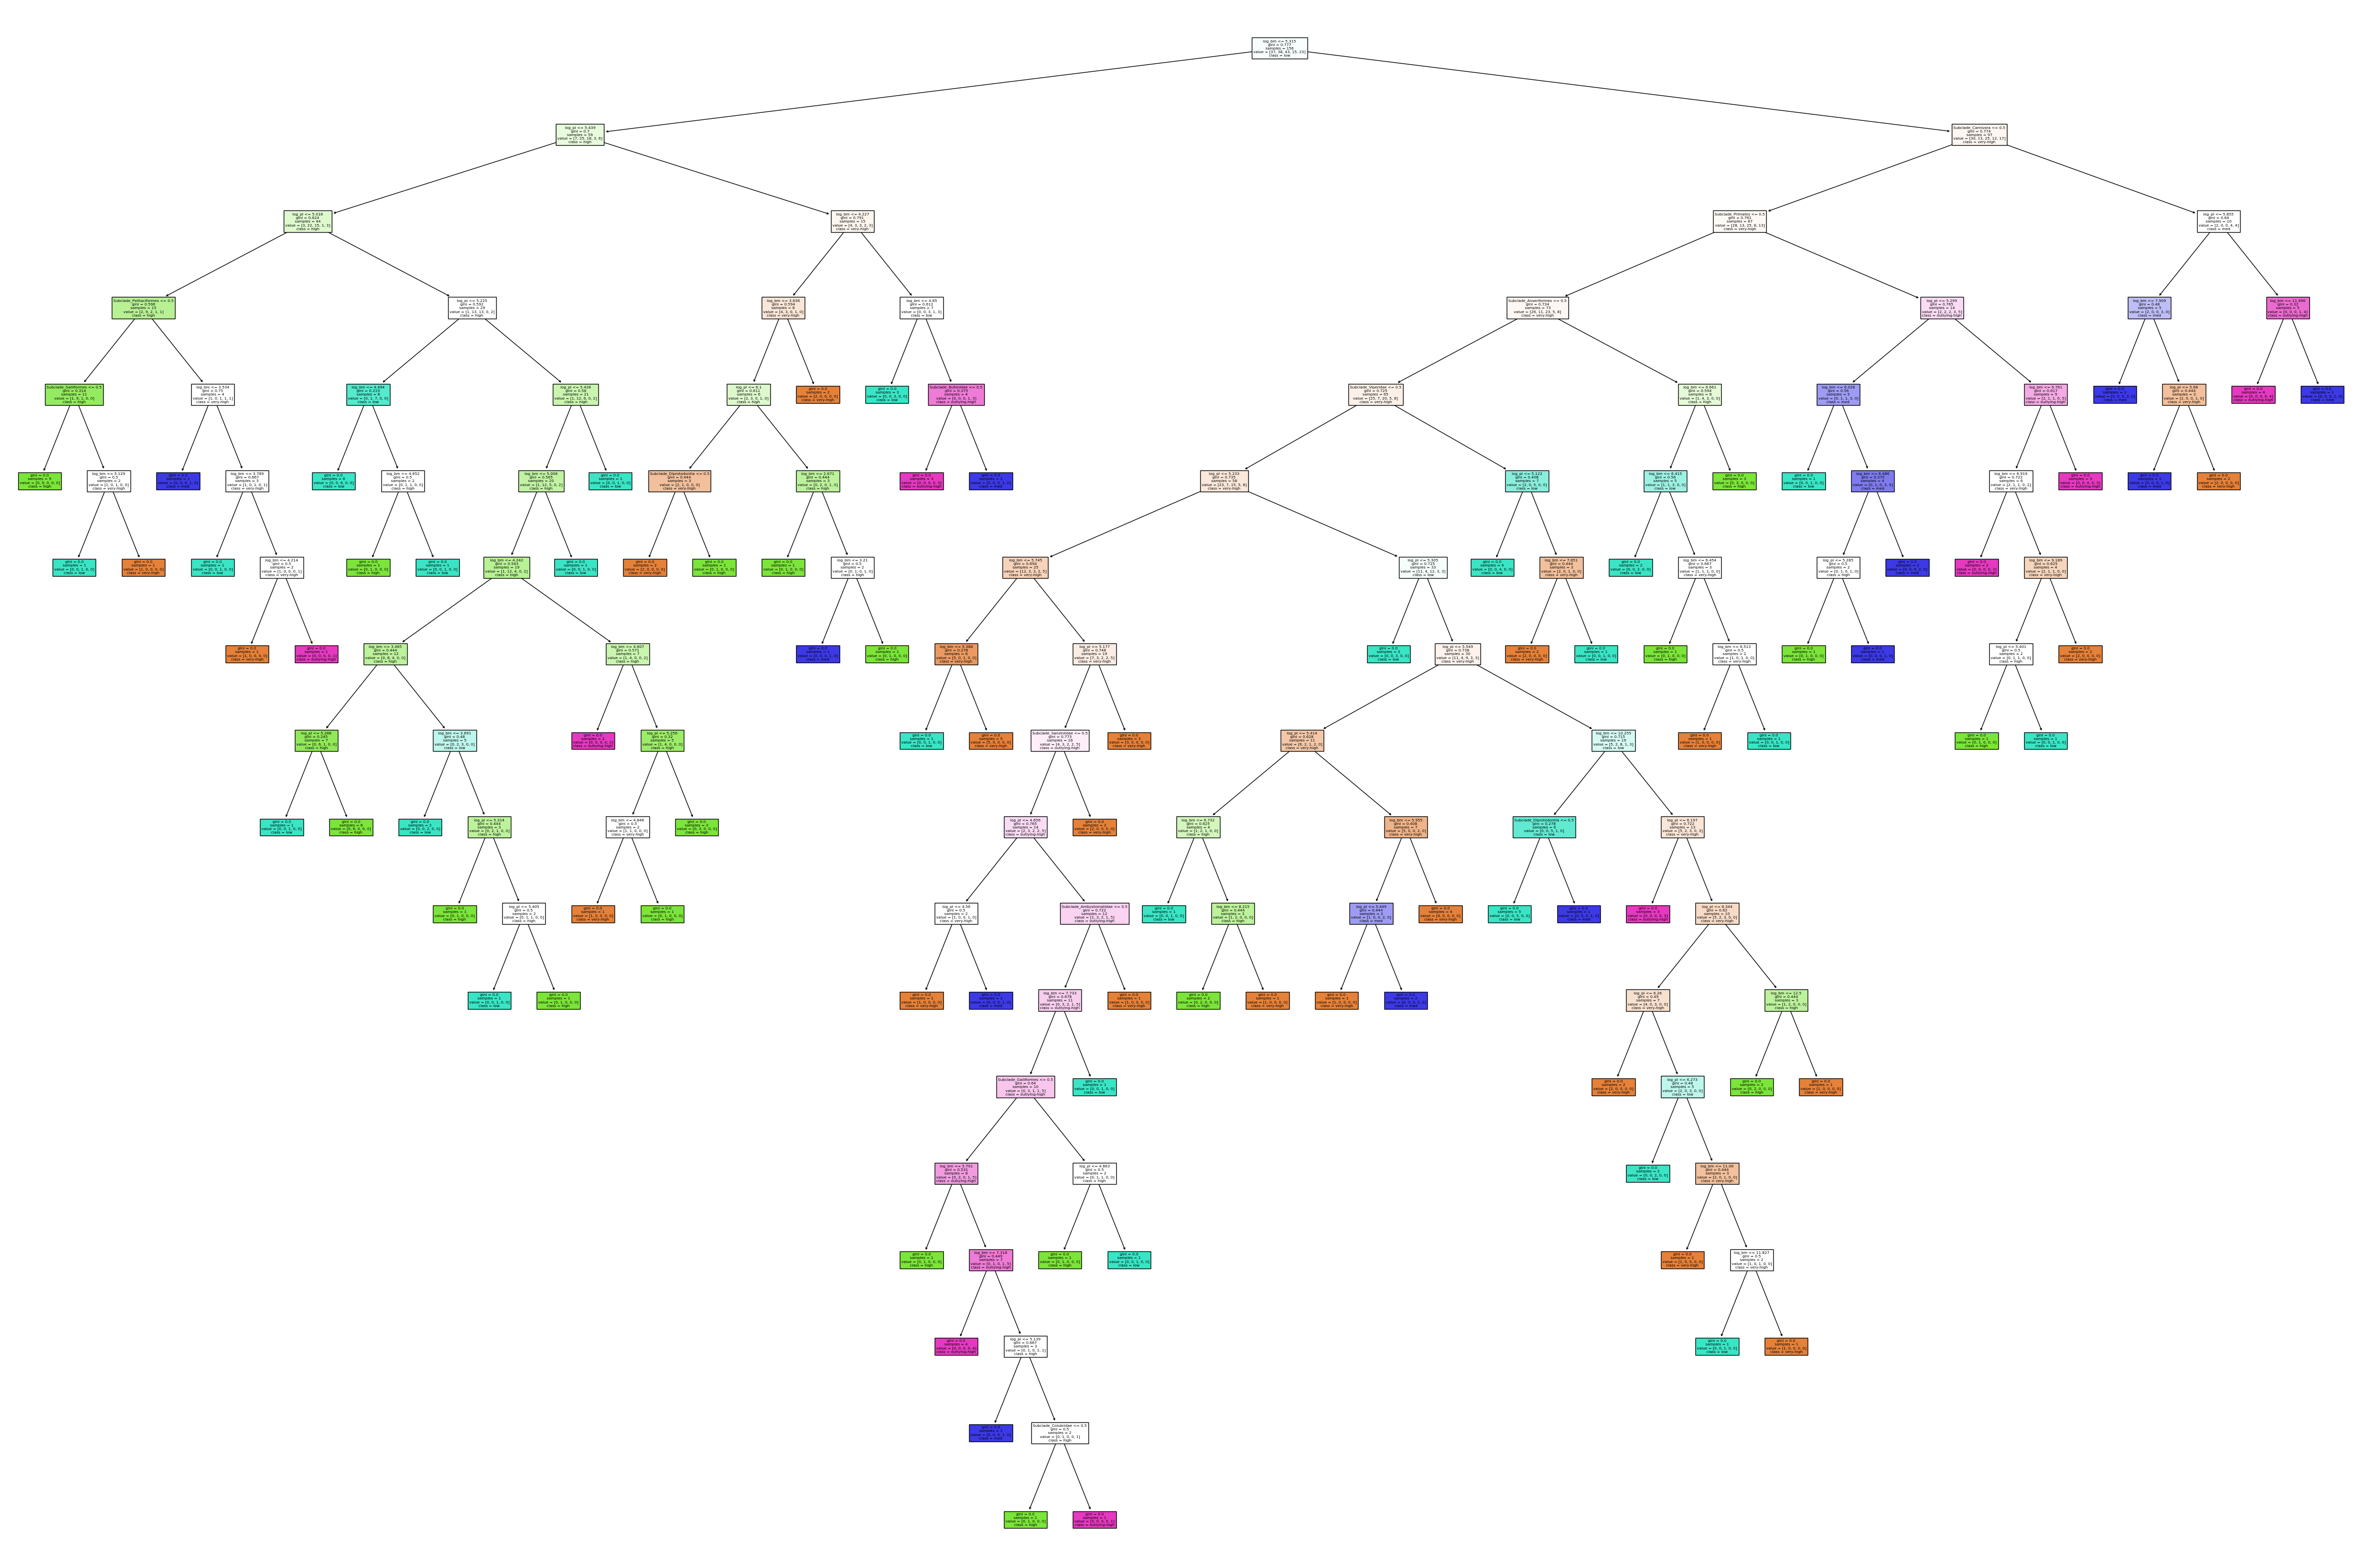

In [33]:
plt.figure(figsize=(60, 40))
plot_tree(clf, filled=True, feature_names=data_feat, class_names=data_df_encoded_subclades["bin_neo"].unique())
plt.show()

In [22]:
data_feat = ["log_pl", "log_bm"] + clade_list + subclade_list
X = data_df_encoded_subclades[data_feat]
y = data_df_encoded_subclades.bin_neo

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Predict the response for train dataset
z_pred = clf.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Test accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Training accuracy:", metrics.accuracy_score(y_train, z_pred))

print(clf.feature_importances_)

Test accuracy: 0.2537313432835821
Training accuracy: 1.0
[0.31991891 0.45814353 0.         0.04372595 0.03201903 0.
 0.         0.         0.         0.         0.00274841 0.
 0.01236786 0.02051628 0.         0.         0.         0.0115826
 0.00934461 0.         0.01319239 0.         0.         0.
 0.         0.00588946 0.         0.         0.         0.
 0.00879493 0.         0.         0.01265936 0.01527995 0.00412262
 0.         0.         0.01539112 0.         0.         0.
 0.         0.01430297]


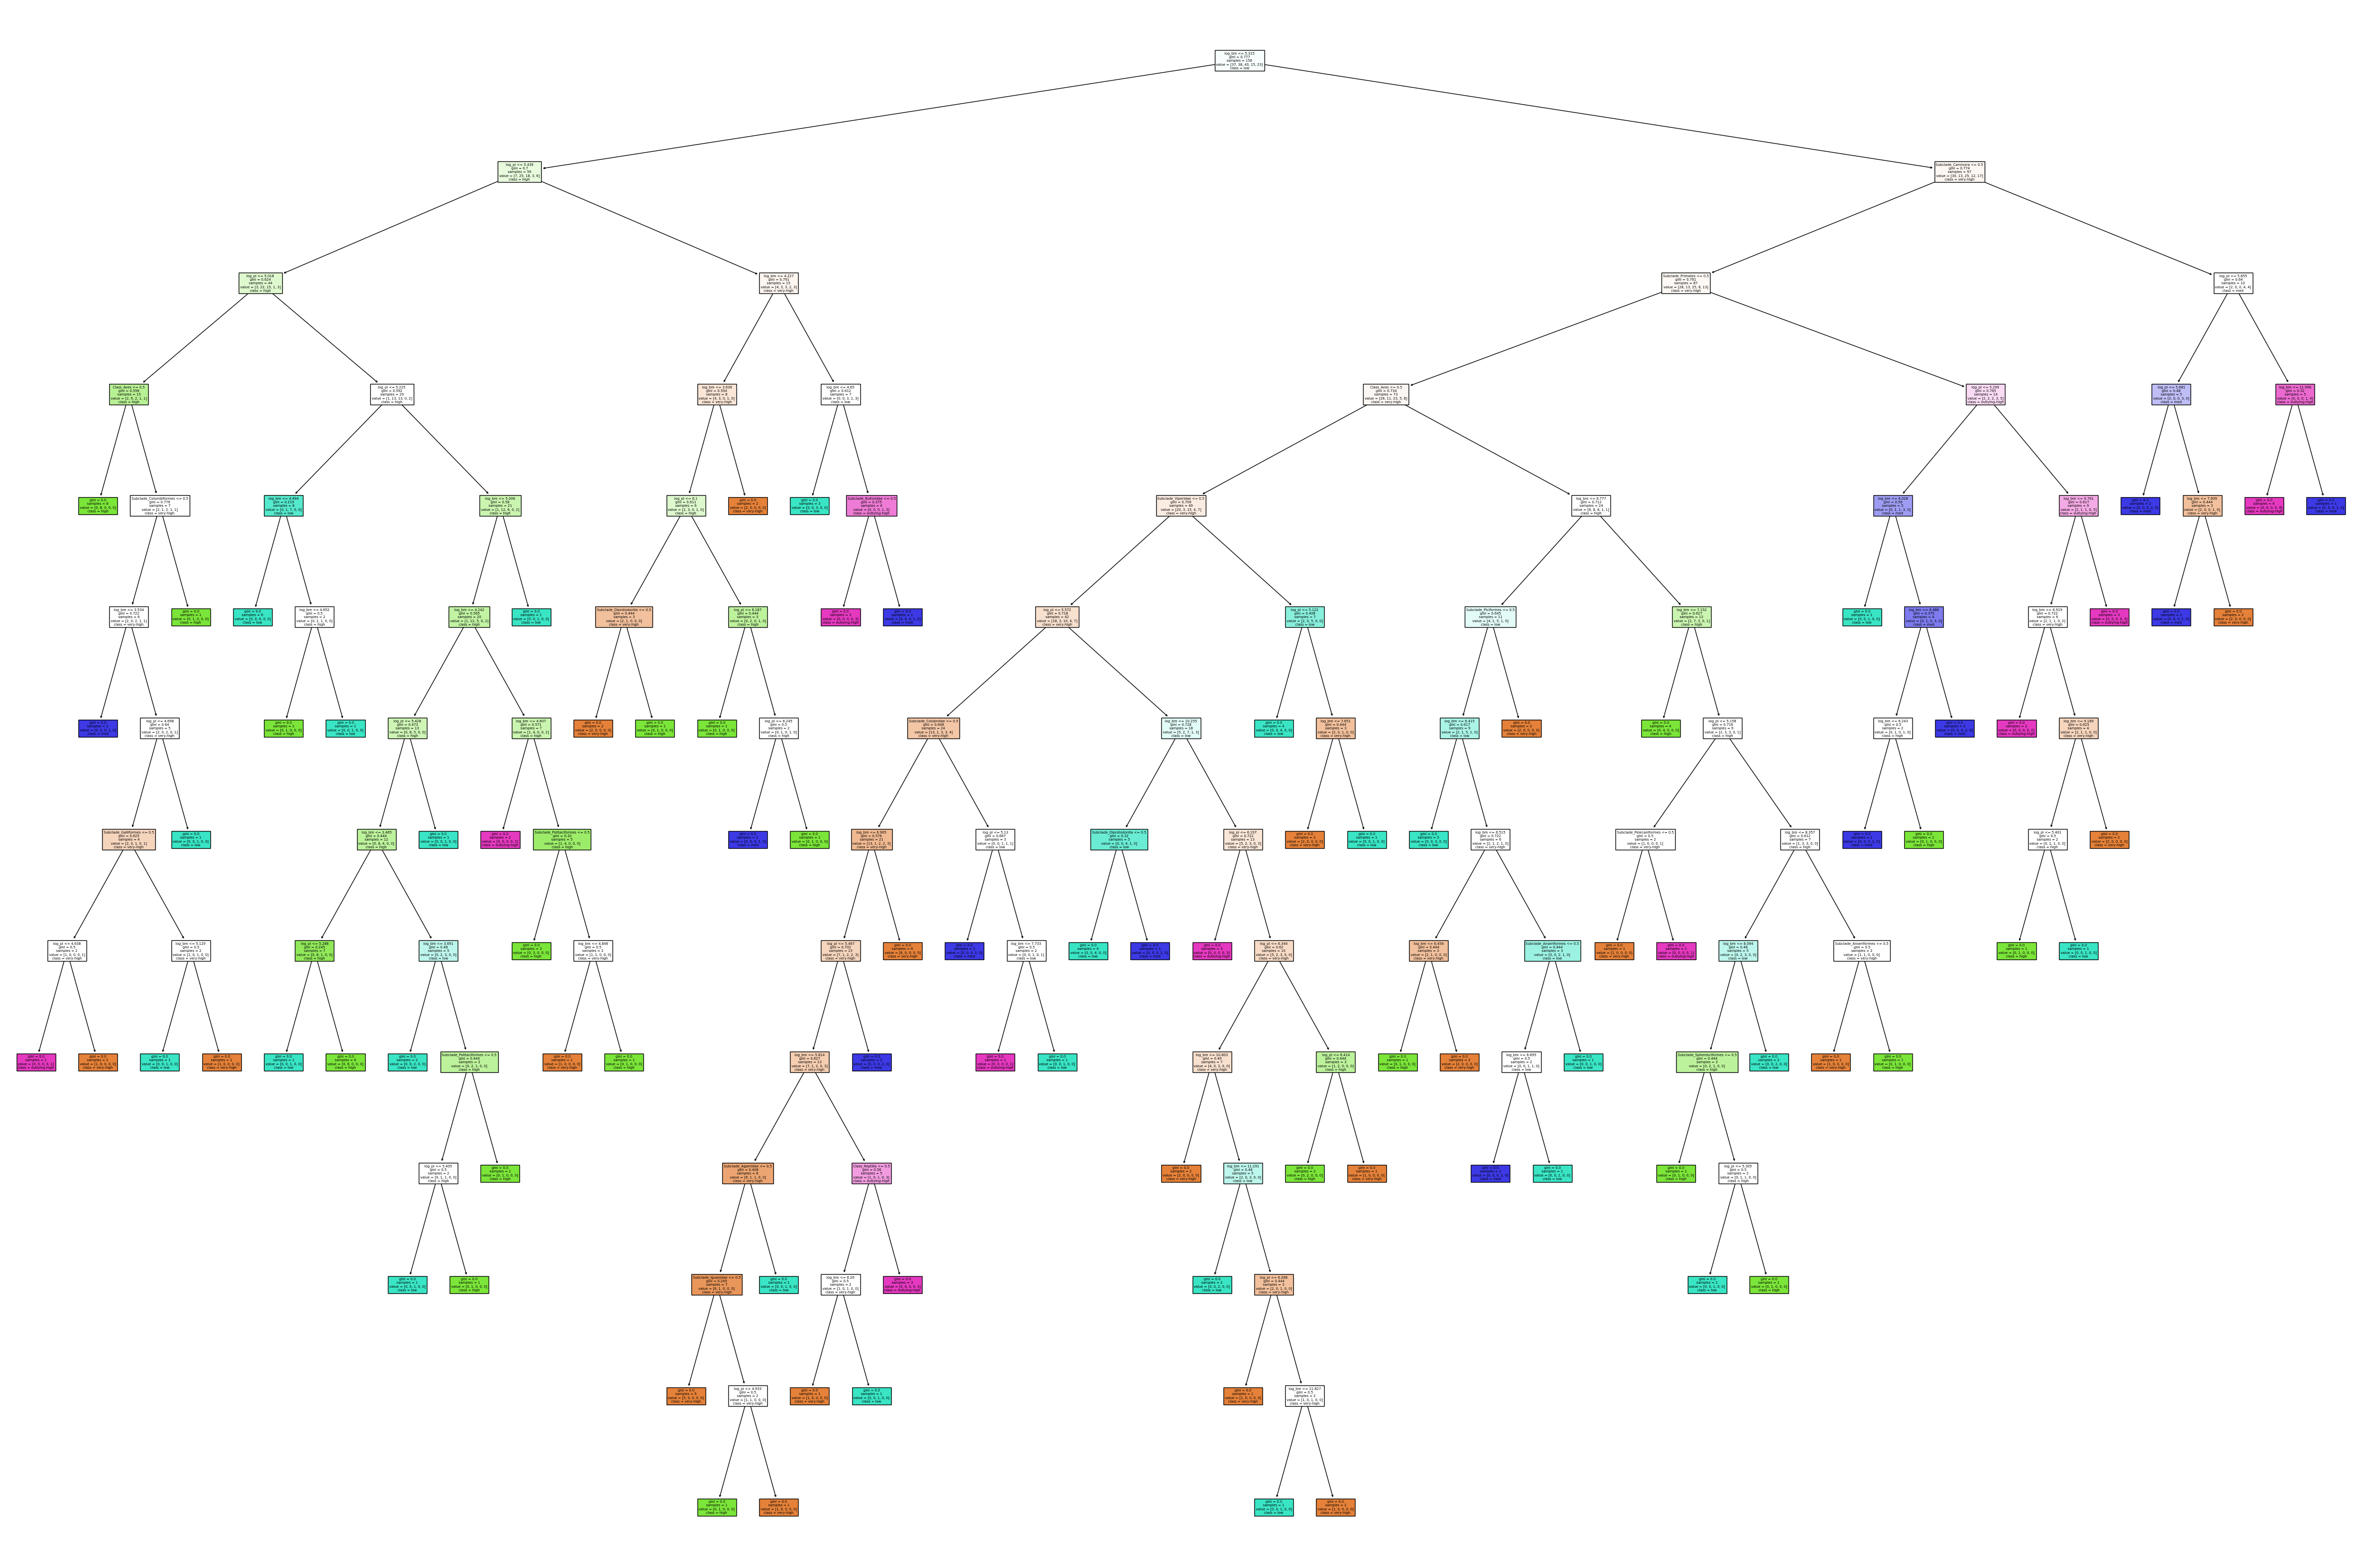

In [35]:
plt.figure(figsize=(60, 40))
plot_tree(clf, filled=True, feature_names=data_feat, class_names=data_df_encoded_subclades["bin_neo"].unique())
plt.show()

# Extraneous tests
Testing for prediction of subclades based on cancer rate (reverse features and classification)

In [ ]:
mam_df = new_data_df[new_data_df["Class"] == "Mammalia"]

In [ ]:
mam_feat = ["log_bm", "log_pl", "neo", "mal"]
A = mam_df[mam_feat]
b = mam_df.Subclade

# Split dataset into training set and test set
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
mdt = DecisionTreeClassifier()

# Train Decision Tree Classifer
mdt = mdt.fit(A_train,b_train)

#Predict the response for test dataset
b_pred = mdt.predict(A_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(b_test, b_pred))

print(mdt.feature_importances_)

In [ ]:
plt.figure(figsize=(120, 80))
plot_tree(mdt, filled=True, feature_names=mam_feat, class_names=mam_df["Subclade"].unique())
plt.show()

In [ ]:
mam_feat = ["log_bm", "log_pl"]
A = mam_df[mam_feat]
b = mam_df.Subclade

# Split dataset into training set and test set
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
mdt = DecisionTreeClassifier()

# Train Decision Tree Classifer
mdt = mdt.fit(A_train,b_train)

#Predict the response for test dataset
b_pred = mdt.predict(A_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(b_test, b_pred))

print(mdt.feature_importances_)

In [ ]:
plt.figure(figsize=(120, 80))
plot_tree(mdt, filled=True, feature_names=mam_feat, class_names=mam_df["Subclade"].unique())
plt.show()

In [ ]:
freq_subcl_df = data_df_encoded[data_df_encoded["Subclade"].isin(data_df_encoded["Subclade"].value_counts()[lambda x: x > 1].index)]
freq_subcl_df = freq_subcl_df.reset_index(drop = True)

In [ ]:
subcl_feat = ["log_pl", "neo", "mal"]
C = freq_subcl_df[subcl_feat]
d = freq_subcl_df.Subclade

# Split dataset into training set and test set
C_train, C_test, d_train, d_test = train_test_split(C, d, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
scdt = DecisionTreeClassifier()

# Train Decision Tree Classifer
scdt = scdt.fit(C_train, d_train)

#Predict the response for test dataset
d_pred = scdt.predict(C_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(d_test, d_pred))

print(scdt.feature_importances_)

In [ ]:
plt.figure(figsize=(60, 40))
plot_tree(scdt, filled=True, feature_names=subcl_feat, class_names=freq_subcl_df["Subclade"].unique())
plt.show()

In [ ]:
subcl_feat = ["log_bm", "log_pl", "neo", "mal"] + clade_list
C = freq_subcl_df[subcl_feat]
d = freq_subcl_df.Subclade

# Split dataset into training set and test set
C_train, C_test, d_train, d_test = train_test_split(C, d, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
scdt = DecisionTreeClassifier()

# Train Decision Tree Classifer
scdt = scdt.fit(C_train, d_train)

#Predict the response for test dataset
d_pred = scdt.predict(C_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(d_test, d_pred))

print(scdt.feature_importances_)

In [ ]:
plt.figure(figsize=(120, 80))
plot_tree(mdt, filled=True, feature_names=subcl_feat, class_names=freq_subcl_df["Subclade"].unique())
plt.show()